Uncomment and run the code below 👇

In [17]:
 library('tidyverse')
 library('tidymodels')

 header = c('Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
            'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings')

 abalone_df = read_csv(
     'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',
     col_types = cols(),
     col_names = header
 )

 abalone_split = initial_split(abalone_df)

 abalone_training = training(abalone_split)
 abalone_testing = testing(abalone_split)

 abalone_recipe = recipe(Rings ~ ., data = abalone_training) %>%
     step_dummy(all_nominal_predictors()) %>%
     step_center(all_numeric_predictors()) %>%
     step_scale(all_numeric_predictors()) %>%
     prep()

We are going to build two models to predict `Rings` with the abalone measurements we collected. The first will be a penalized regression model and the second a random forest model.

We use the `linear_reg` to generate linear regression models with `TidyModels`. There are different underlying "engines" (i.e. implementations of regression algorithms) available to us. Use the `show_engines` function with "linear_reg" (quoted) as the argument to see the available "engines."

In [18]:
lm_fit = linear_reg(penalty = .1, mixture = 1)  %>% 
    set_engine('glmnet')  %>% 
    fit(Rings ~., data = bake(abalone_recipe, new_data = NULL))

🐚 🛑 wait here

## Regression model

With `TidyModels` we select the model/engine then and pass that to the `fit` function. Below is an example for a regularized regression model. Uncomment and run.

In [19]:
 lm_fit = linear_reg(penalty = 0.1, mixture = 1) %>% 
   set_engine("glmnet") %>%
   fit(Rings ~ ., data = bake(abalone_recipe, new_data = NULL))

We can "predict" the Rings from our testing data using the `predict` function. `predict` takes two arguments:
1. the "fit" (`lm_fit` above 👆), and,
1. testing data

Create `baked` testing data using the `bake` function and with your `abalone_testing` data.

In [20]:
abalone_testing_baked = bake(abalone_recipe, new_data = abalone_testing)

Now predict 🔮!

In [21]:
 predict(lm_fit, new_data = abalone_testing_baked)

.pred
<dbl>
9.071598
9.649193
10.017060
11.599835
13.185141
11.683491
11.179945
8.929656
6.001359


It's that simple 🙂

🐚 🛑 wait here

## Random forest model

Let's build a random forest model now. Uncomment and run the code below.

In [22]:
 show_engines("rand_forest")

engine,mode
<chr>,<chr>
ranger,classification
ranger,regression
randomForest,classification
randomForest,regression
spark,classification
spark,regression


Replace `linear_reg` from your regression code above with `rand_forest`. Add the argument `mode = "regression"` and capture the output with the variable name `rf_fit`.

In [26]:
 rf_fit = rand_forest(mode = 'regression') %>% 
   set_engine("ranger") %>%
   fit(Rings ~ ., data = bake(abalone_recipe, new_data = NULL))


Now predict rings with your `rf_fit` model 🔮...

In [28]:
baked_abalone = bake(abalone_recipe, new_data = abalone_testing)

In [29]:
predict(rf_fit, new_data = baked_abalone)


.pred
<dbl>
8.756482
9.162755
10.055500
12.620167
13.732267
11.557233
10.590000
8.154667
4.825800


🐚 🛑 wait here

Let's make a figure to compare the models.

The code below gives you a "wide" data frame of your predictions versus the actual `Rings` values.""

In [30]:
 pred_df = abalone_testing %>%
     select(Rings, Sex) %>%
     rename(truth = Rings) %>%
     bind_cols(
         predict(lm_fit, new_data = bake(abalone_recipe, new_data = abalone_testing)) %>%
             rename(lr_pred = .pred)
     ) %>%
     bind_cols(
         predict(rf_fit, new_data = bake(abalone_recipe, new_data = abalone_testing)) %>%
             rename(rf_pred = .pred)
     )

 pred_df %>% head

truth,Sex,lr_pred,rf_pred
<dbl>,<chr>,<dbl>,<dbl>
15,M,9.071598,8.756482
9,M,9.649193,9.162755
10,F,10.017060,10.055500
15,M,11.599835,12.620167
15,F,13.185141,13.732267
19,F,11.683491,11.557233


Make a chart with `truth` on the `y-axis` and predictions on the `x-axis` facetted by the model. 

(**Hint: use `pivot_longer` to get the data into the correct shape!**) 

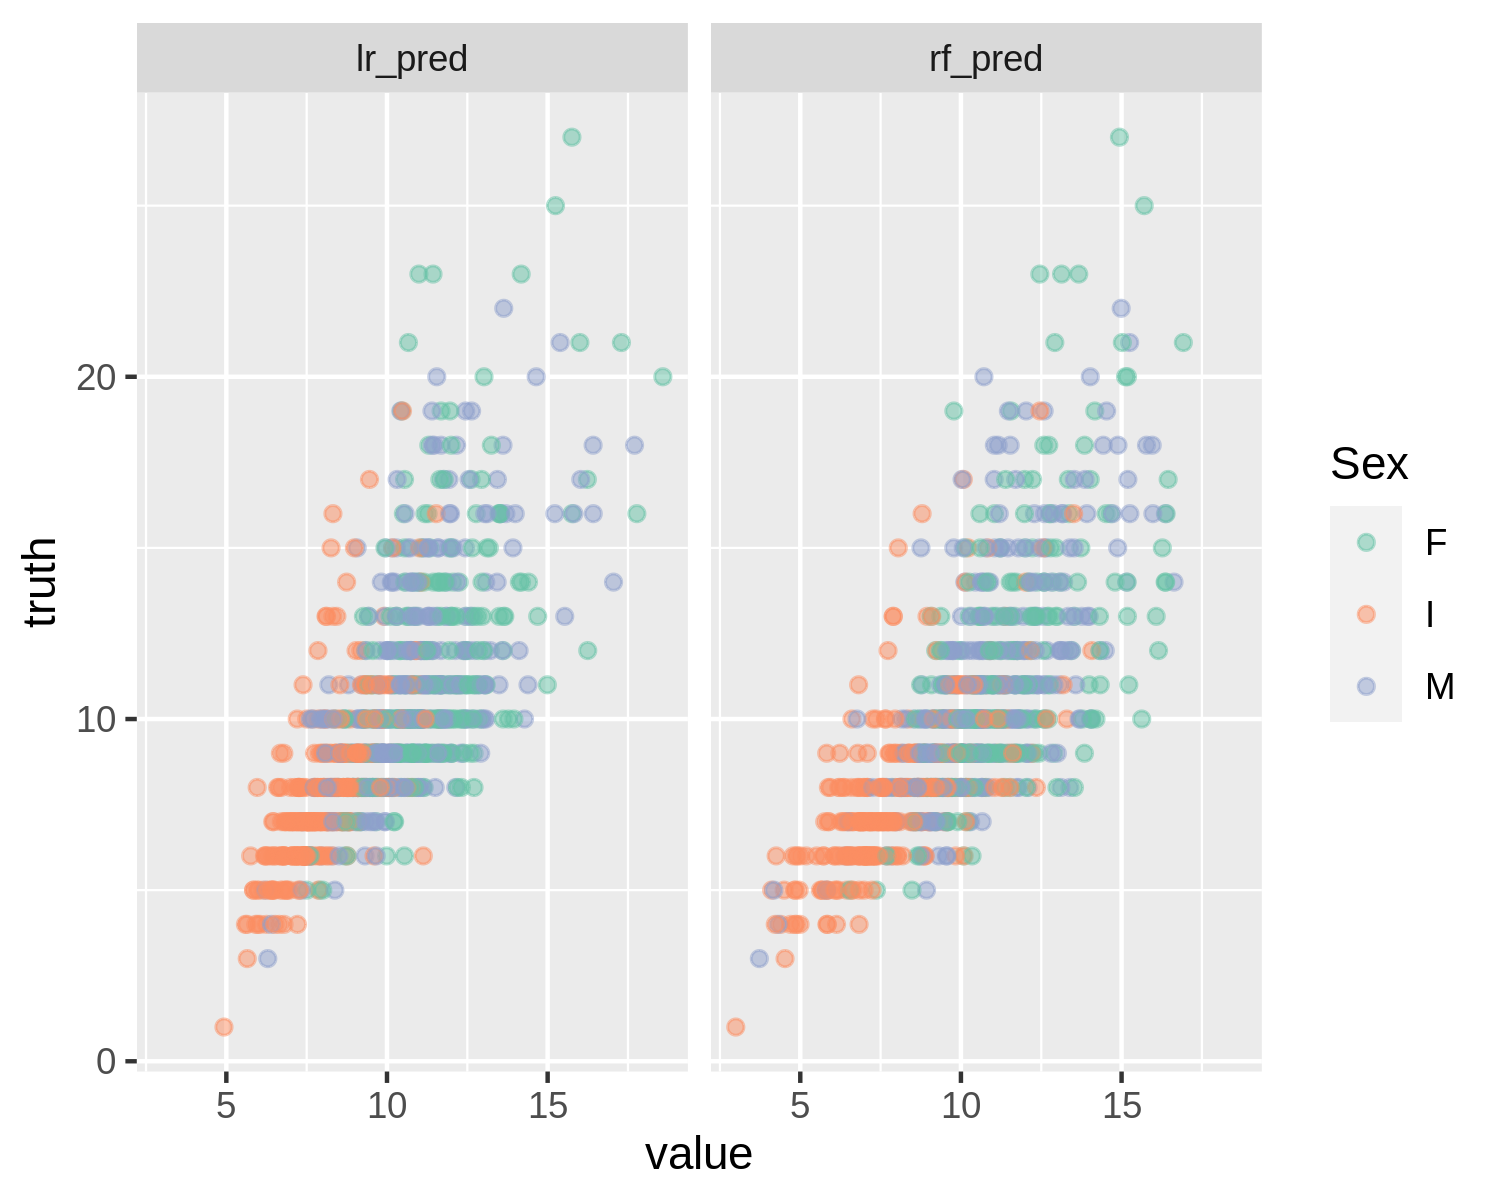

In [33]:
df_long = pred_df  %>% 
    pivot_longer(cols = c(lr_pred, rf_pred))


p = ggplot(df_long, aes(y = truth, x = value, color = Sex))

p = p + geom_point(alpha = .5)

p = p + facet_wrap(~name)

p = p + scale_color_brewer(palette = 'Set2')

p

Uncomment the cell below and change to markdown to see my solution.

 ![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/14/mod_comp.png?raw=true)

We can also use the `metrics` function to calculate model performance. Here are the model metrics for the random forest model:

In [32]:
 pred_df %>% metrics(truth = truth, estimate = rf_pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.1994113
rsq,standard,0.5332662
mae,standard,1.5776957


Which model performed better?